In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("area.csv")

In [3]:
df

,area,price
0,2600,5500000
1,3000,5650000
2,3200,6100000
3,3600,6800000
4,4000,7250000


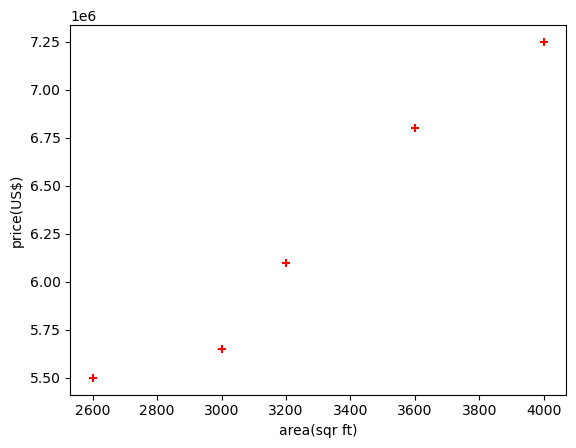

In [4]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [5]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
reg.predict(pd.DataFrame({'area': [3300]}))

array([6287157.53424658])

In [7]:
reg.predict([[3300]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6287157.53424658])

In [8]:
reg.predict(pd.DataFrame({'area': [300]}))

array([2213527.39726027])

In [9]:
## y=mx+by (m=coef, x=area, b=intercpt)
reg.coef_

array([1357.87671233])

In [10]:
reg.intercept_

1806164.3835616428

In [11]:
b=pd.DataFrame({'area':[1000, 1200, 1500, 1800, 2000, 2200, 2500, 2700, 3000, 3200, 3500, 3700, 4000, 4200, 4500]})

In [12]:
b.to_csv("area3.csv",index=False)

In [13]:
file2=pd.read_csv('area3.csv')


In [14]:
p1=reg.predict(file2)

In [15]:
file2['prices']=p1

In [16]:
file2

,area,prices
0,1000,3.164041e+06
1,1200,3.435616e+06
2,1500,3.842979e+06
3,1800,4.250342e+06
4,2000,4.521918e+06
5,2200,4.793493e+06
6,2500,5.200856e+06
7,2700,5.472432e+06
8,3000,5.879795e+06
9,3200,6.151370e+06


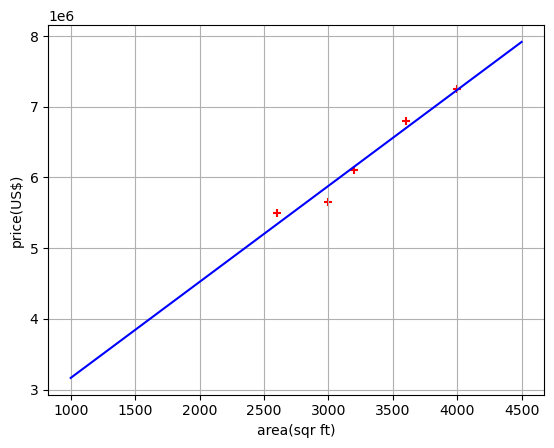

In [79]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.grid(True)
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(file2.area, p1, color='blue')


In [80]:
gdp_ca=pd.read_csv('canada_per_capita_income.csv')

In [81]:
gdp_ca

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


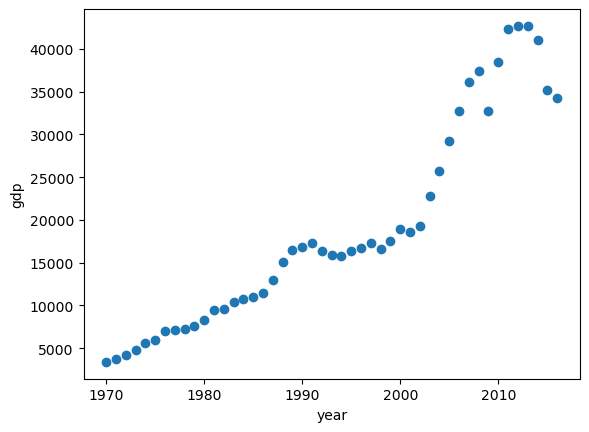

In [82]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('gdp')
plt.scatter(gdp_ca['year'], gdp_ca['per capita income (US$)'])

In [46]:
gdp_ca.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [47]:
reg=linear_model.LinearRegression()
reg.fit(gdp_ca[['year']],gdp_ca['per capita income (US$)'])

LinearRegression()

In [48]:
reg.predict([[2020]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

# Saving Models

In [83]:
import pickle 

In [84]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [85]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)
    

In [59]:
mp.predict([[2050]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66142.6463511])

In [2]:
import joblib

In [89]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [3]:
mj=joblib.load('model_joblib')

In [4]:
mj.predict([[3300]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6287157.53424658])